In [3]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
#GIT = 'https://github.com/tyokokur/tmpdat/raw/main/sysg3/'
#''' If SSL error _ssl.c:997: 
#    pip install --upgrade certifi'''

from sysg3_data import *

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [1]:
## Local
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/' 
fp = fp_work

## Files needed locally
f1_fnames = []

f3_fnames = ['ph_a30s5e3_cyl.dat', 'ph_a30s020_cyl.dat', 'ph_a30s030_cyl-str.dat', 'ph_a30s055_str.dat']
f3_boxes  = [(), (), (12.2, 18.2, 70.2), (10.2, 20.2, 100.2)]

f6_fnames = ['ph_a20s020_mic-mul.dat', 'ph_a30s020_str-mul.dat', 'ph_a30s040_hom-mul.dat']
f6_boxes  = []

# Figure 1

# Figure 2

# Figure 3

# Figure 4

In [12]:
a = 0.30
srange = np.arange(0.0025, 0.055, 1e-04)

srange

array([0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048,
       0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056,
       0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099, 0.01  , 0.0101, 0.0102, 0.0103, 0.0104,
       0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011 , 0.0111, 0.0112,
       0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012 ,
       0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.0126, 0.0127, 0.0128,
       0.0129, 0.013 , 0.0131, 0.0132, 0.0133, 0.0134, 0.0135, 0.0136,
      

# Figure 5

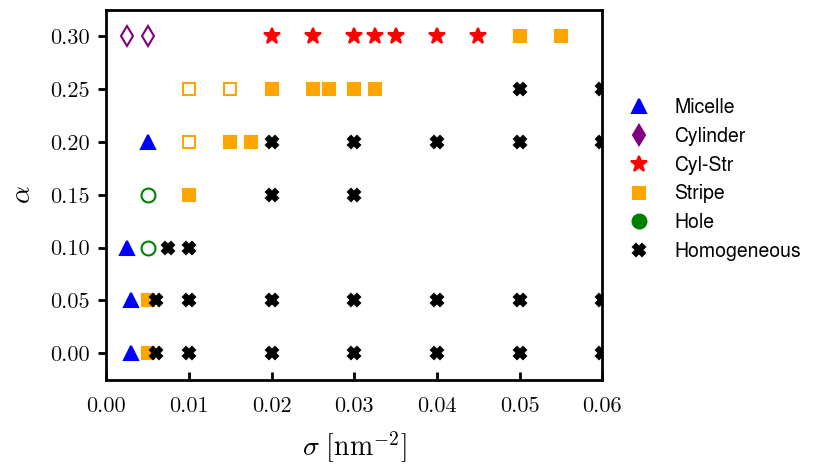

In [4]:
morph_ms = {
    'mic': {'marker':'^', 'c':'blue'  , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'purple', 'ms':10},
    'cyl-str': {'marker':'*', 'c':'red', 'ms':12},
    'str': {'marker':'s', 'c':'orange', 'ms':8 }, 
    'hol': {'marker':'o', 'c':'green' , 'ms':10}, 
    'hom': {'marker':'X', 'c':'black' , 'ms':8}
}
leg_ms = [Line2D([0],[0], **morph_ms[mor], lw=0) for mor in morph_ms.keys()]
leg_labs=['Micelle', 'Cylinder', 'Cyl-Str', 'Stripe', 'Hole', 'Homogeneous']

def get_Morph(a,s):
    AX = All.all[All.all.loc[:,'alpha'] == a]
    AXSY = AX[AX.loc[:,'sigma'] == s].reset_index()
    return AXSY.morph[np.nanargmin([i.minF() for i in AXSY.data])], min([i.minF() for i in AXSY.data]), AXSY.multi[np.nanargmin([i.minF() for i in AXSY.data])], AXSY.done.to_list()

for (a,s) in [(0.00, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 5e-03, 7.5e-03, 1e-02)] +\
             [(0.15, i) for i in (5e-03, 1e-02, 2e-02, 3e-02)] +\
             [(0.20, i) for i in (5e-03, 1e-02, 1.5e-02, 1.75e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.25, i) for i in (1.0e-02, 1.5e-02, 2e-02, 2.5e-02, 2.7e-02, 3e-02, 3.25e-02, 5e-02, 6e-02)] +\
             [(0.30, i) for i in (2.5e-03, 5e-03, 2e-02, 2.5e-02, 3e-02, 3.25e-02, 3.5e-02, 
                                  4e-02, 4.5e-02, 5e-02, 5.5e-02)]:
    morph, minF, mul, done = get_Morph(a,s)
    x,y,mor = s, a, morph
    
    if done == [True]*len(done): 
        if mul:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc=tjy.lighten_color(morph_ms[mor]['c'], 0.3))
        else:     plt.plot(x,y, lw=0, **morph_ms[mor])
    else:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc='w')

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$')
plt.xlim(0, 0.060)
plt.ylabel(r'$\alpha$')
plt.ylim(-0.025,0.325)
plt.legend(leg_ms, leg_labs, loc=(1.02,0.3))
tjy.ticks()